# More on Types / Tokens

 - Type: "the" - 1
 - Token: "the" - 5

In [146]:
import nltk
from nltk.book import *
import pandas as pd
import collections

In [2]:
porkyWords = "the the the the the that's all folks".split()

In [3]:
porkyWords.count('the')

5

In [4]:
porkyWords.count('all')

1

## Type / Token Ratio

Type / token ratio (TTR) 

Number of types / number of tokens. 

Sometimes a proxy for the vocabulary of a text. 

Important: very sensitive to the number of a words in a text. 

In [6]:
numTokens = len(porkyWords)

In [7]:
set(porkyWords)

{'all', 'folks', "that's", 'the'}

In [8]:
numTypes = len(set(porkyWords))

In [9]:
numTypes

4

In [10]:
numTokens

8

In [11]:
typeTokenRatio = numTypes / numTokens

In [12]:
typeTokenRatio

0.5

In [13]:
def typeTokenRatio(tokens):
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [17]:
allTexts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [26]:
for text in allTexts: 
    namePadded = (text.name + '                                ')[:40] + '||'
    print(namePadded, len(text.tokens))

Moby Dick by Herman Melville 1851       || 260819
Sense and Sensibility by Jane Austen 181|| 141576
The Book of Genesis                     || 44764
Inaugural Address Corpus                || 149797
Chat Corpus                             || 45010
Monty Python and the Holy Grail         || 16967
Wall Street Journal                     || 100676
Personals Corpus                        || 4867
The Man Who Was Thursday by G . K . Ches|| 69213


In [27]:
for text in allTexts: 
    print(text.name, typeTokenRatio(text))

Moby Dick by Herman Melville 1851 0.07406285585022564
Sense and Sensibility by Jane Austen 1811 0.04826383002768831
The Book of Genesis 0.06230453042623537
Inaugural Address Corpus 0.06617622515804722
Chat Corpus 0.13477005109975562
Monty Python and the Holy Grail 0.1276595744680851
Wall Street Journal 0.12324685128531129
Personals Corpus 0.22765564002465585
The Man Who Was Thursday by G . K . Chesterton 1908 0.0983485761345412


In [29]:
truncatedTexts = [] 
for text in allTexts: 
    truncatedTokens = text.tokens[:4000]
    truncatedTexts.append(truncatedTokens)

## Aside: List Comprehension

A backwards way of writing `for` loop, for the specific case of making a new list out of the results

In [31]:
truncatedTexts = [text.tokens[:4000] for text in allTexts]

In [32]:
[len(text) for text in truncatedTexts]

[4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000]

In [33]:
def lowercaseIt(tokens): 
    return [token.lower() for token in tokens]

In [35]:
lowercasedTruncatedTokens = [lowercaseIt(tokens) for tokens in truncatedTexts]

In [36]:
ttr = [typeTokenRatio(tokens) for tokens in lowercasedTruncatedTokens]

In [37]:
ttr

[0.31675, 0.21525, 0.14275, 0.288, 0.2665, 0.16775, 0.332, 0.1935, 0.2735]

In [42]:
for i in range(0, 9): 
    print(allTexts[i].name, ttr[i])

Moby Dick by Herman Melville 1851 0.31675
Sense and Sensibility by Jane Austen 1811 0.21525
The Book of Genesis 0.14275
Inaugural Address Corpus 0.288
Chat Corpus 0.2665
Monty Python and the Holy Grail 0.16775
Wall Street Journal 0.332
Personals Corpus 0.1935
The Man Who Was Thursday by G . K . Chesterton 1908 0.2735


In [47]:
list(zip([1, 2, 3], ['a', 'b', 'c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

## Aside: tuples

In [48]:
type((1, 'a'))

tuple

In [49]:
(1, 'a')[0]

1

In [50]:
(1, 'a')[1]

'a'

In [51]:
(1, 'a').append(1)

AttributeError: 'tuple' object has no attribute 'append'

In [52]:
for textName, ratio in zip(allTexts, ttr): 
    print(textName, ratio)

<Text: Moby Dick by Herman Melville 1851> 0.31675
<Text: Sense and Sensibility by Jane Austen 1811> 0.21525
<Text: The Book of Genesis> 0.14275
<Text: Inaugural Address Corpus> 0.288
<Text: Chat Corpus> 0.2665
<Text: Monty Python and the Holy Grail> 0.16775
<Text: Wall Street Journal> 0.332
<Text: Personals Corpus> 0.1935
<Text: The Man Who Was Thursday by G . K . Chesterton 1908> 0.2735


In [53]:
moonstone = open('../Readings/content/texts/moonstone.md').read()

In [54]:
moonstoneParts = moonstone.split('##')

In [56]:
betteredge = moonstoneParts[5:29]
clack = moonstoneParts[31:39]
bruff = moonstoneParts[40:43]

In [60]:
narrators = []
for narr in [betteredge, clack, bruff]:
    narrStr = '\n'.join(narr)
    narrators.append(narrStr)

In [71]:
narrators = ['\n'.join(narr) for narr in [betteredge, clack, bruff]] 

In [80]:
narratorsDict = {"betteredge": narrators[0], 
                 "clack": narrators[1], 
                 "bruff": narrators[2]}

In [78]:
def typeTokenRatio(textString): 
    tokens = nltk.word_tokenize(textString)
    numTokens = len(tokens)
    types = set(tokens)
    numTypes = len(types)
    return numTypes / numTokens

In [82]:
def dictToTypeTokenRatio(textDict): 
    """ 
    Takes as input a dictionary where the dictionary keys are text labels, 
    and the dictionary values are that text's string, and 
    returns as output that dictionary again, but with type token ratios as values. 
    """
    ttrDict = {}
    for textLabel in textDict:
        text = textDict[textLabel] 
        ttr = typeTokenRatio(text)
        ttrDict[textLabel] = ttr
    return ttrDict

In [75]:
ttrs = []
for narr in narrators: 
    print(typeTokenRatio(narr))

0.07155880152181016
0.12439623526814055
0.17438692098092642


In [77]:
for narr in narratorsDict: 
    tokens = narratorsDict[narr]
    print(narr, typeTokenRatio(tokens))

betteredge 0.07155880152181016
clack 0.12439623526814055
bruff 0.17438692098092642


In [83]:
dictToTypeTokenRatio(narratorsDict)

{'betteredge': 0.07155880152181016,
 'clack': 0.12439623526814055,
 'bruff': 0.17438692098092642}

## Counting Words

In [85]:
porkyWords.count('the')

5

In [100]:
def removePunctuation(text): 
    for punct in "!@#$%^&*()“”.,?<>:;–’\xa0":
        text = text.replace(punct, ' ')
    return text

In [102]:
removePunctuation("Hello!!!\xa0World!!!!")

'Hello    World    '

In [104]:
cleanTexts = {}
for narratorLabel in narratorsDict:
    narratorText = narratorsDict[narratorLabel]
    lowerText = narratorText.lower()
    lowerText = removePunctuation(lowerText)
    cleanTexts[narratorLabel] = lowerText

In [106]:
tokensDict = {}
for narratorLabel in cleanTexts: 
    cleanText = cleanTexts[narratorLabel]
    tokens = nltk.word_tokenize(cleanText)
    tokensDict[narratorLabel] = tokens

In [107]:
betteredgeTokens = tokensDict['betteredge']

In [108]:
len(betteredgeTokens)

80364

In [109]:
len(tokensDict['clack'])

30943

In [110]:
betteredgeTokens.count('him')

400

In [111]:
tokensDict['clack'].count('him')

133

In [120]:
def compareWordCounts(word): 
    wordCountDict = {}
    for narratorLabel in tokensDict: 
        tokens = tokensDict[narratorLabel]
        wordCountDict[narratorLabel] = tokens.count(word) / len(tokens)
    return wordCountDict

In [122]:
godfreys = compareWordCounts('godfrey')

In [124]:
godfreys

{'betteredge': 0.0006470558956746802,
 'clack': 0.00413663833500307,
 'bruff': 0.0012404580152671756}

What word do you want to compare? thought


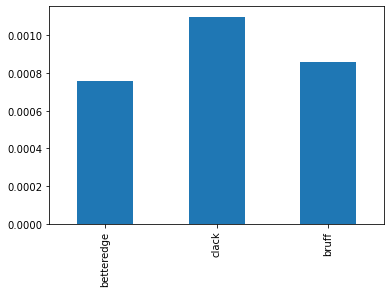

In [130]:
word = input('What word do you want to compare?')
counts = compareWordCounts(word)
series = pd.Series(counts)
series.plot(kind='bar')

## Sentence Tokenization

While `nltk.word_tokenize()` breaks up a text into words, `nltk.sent_tokenize()` breaks up a text into sentences. 

In [133]:
clackNarrative = narratorsDict['clack']
clackSents = nltk.sent_tokenize(clackNarrative)

In [137]:
len(clackSents[85])

44

In [139]:
len(nltk.word_tokenize(clackSents[85]))

9

## Counting Words

In [142]:
betteredgeTokens = nltk.word_tokenize(narratorsDict['betteredge'])

In [143]:
len(betteredgeTokens)

94887

The long way of doing it: 

In [144]:
betteredgeCounts = {}
# Make a dictionary like {"word": 8}, or the word and its count. 
for word in betteredgeTokens: 
    if word in betteredgeCounts: 
        betteredgeCounts[word] = betteredgeCounts[word] + 1 
    else: 
        betteredgeCounts[word] = 1

The short way: 

In [147]:
betteredgeCounter = collections.Counter(betteredgeTokens)

In [149]:
betteredgeCounter['Diamond']

148

In [158]:
# collections.Counter(betCleanTokens).most_common(30)

In [157]:
def makeCounter(text): 
    return collections.Counter(nltk.word_tokenize(removePunctuation(text.lower())))

In [160]:
# makeCounter(narratorsDict['clack'])

In [164]:
counters = {}
for narratorLabel in narratorsDict: 
    text = narratorsDict[narratorLabel]
    counter = makeCounter(text)
    counters[narratorLabel] = counter

In [167]:
for narr in counters: 
    counter = counters[narr]
    print(narr, counter['diamond'])

betteredge 164
clack 13
bruff 20
